In [42]:
import numpy as np
import pandas as pd
import cv2
import networkx as nx
from tools import *
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
import glob
plt.style.use('JHStyleBold.mplstyle')

In [43]:
# Configurações de diretórios
path_img_folder = "./Dados_image/temp/"
folder_original = glob.glob(path_img_folder + "*")
count = 0


In [44]:
count_nodes_imgs = np.zeros(len(folder_original))
for img_path  in folder_original:

    img_th = th_otsu(gray(cv2.imread(img_path )))
    sk = skeletonize(img_th,  method= 'zhang').astype(int)*255

    dic,edges,nodes=nodEdg(sk)

    G=nx.from_pandas_edgelist(edges)
    #fig, ax = plt.subplots(figsize = (40, 30))
    pos = dic  # position layout
    count_nodes_imgs[count] = len(nodes)
    count+=1

    #nx.draw_networkx(G, pos, nodelist= nodes, node_size=2,with_labels=False, node_color="white",edgecolors='black', linewidths=5, alpha=1 , width = 5)
    #ax.set_axis_off()
    #fig.tight_layout()
    #plt.show()


Quero calcular a quantidade de nodes da rede. Existe uma dispersão grande ? 

https://docs.python.org/pt-br/3/library/statistics.html#statistics.pstdev

1880.9601271691008


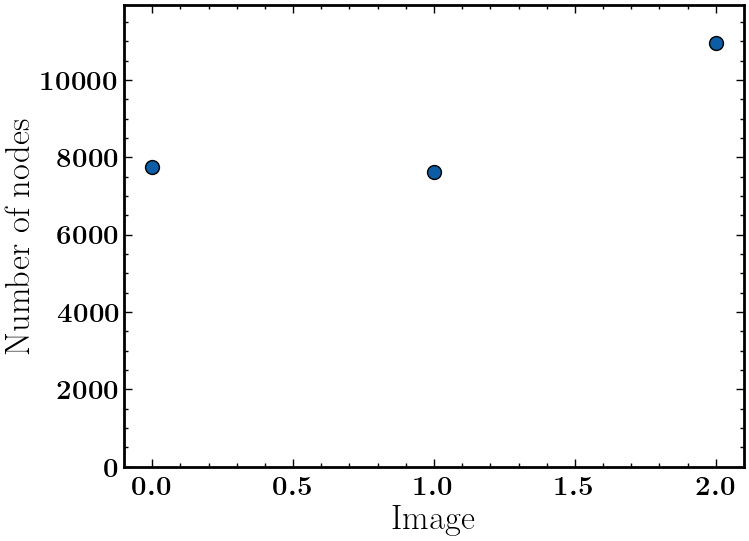

In [45]:
from statistics import stdev
def graphic_nodes(count_nodes_imgs,folder_original):
    x = np.arange(len(folder_original))
    plt.plot(x, count_nodes_imgs, 'o')
    plt.ylabel('Number of nodes')
    plt.xlabel('Image')
    plt.ylim([0,np.max(count_nodes_imgs)+1000])
    

graphic_nodes(count_nodes_imgs,folder_original)
print(stdev(count_nodes_imgs))

aqui estou calculando average degree of a node usando. Nesse caso para cada imagem de celula temos um ponto no grafico.

https://bookdown.org/omarlizardo/_main/2-7-average-degree.html



{1: 2.0, 2: 1.5}

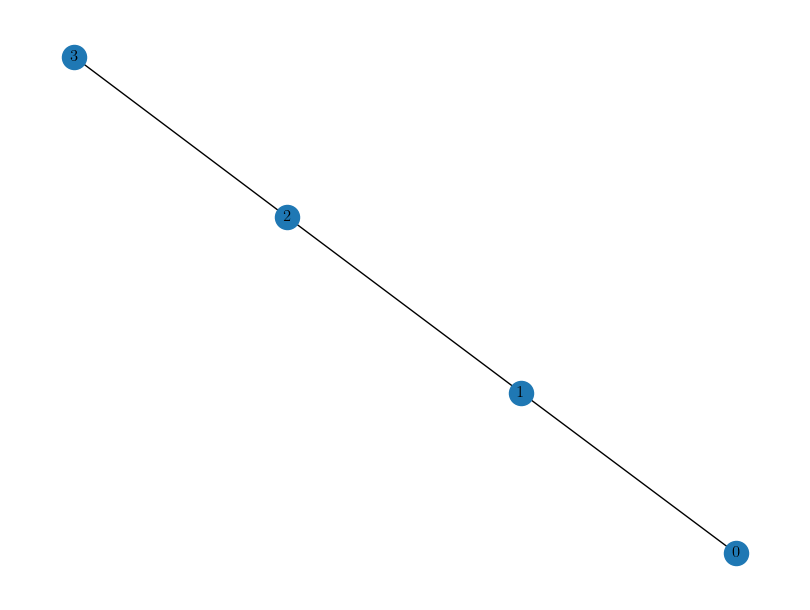